In [1]:
import cv2
import os
import numpy as np
from keras.utils import to_categorical

In [2]:
data='/content/drive/MyDrive/dataset'

In [3]:
categories=os.listdir(data)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

In [4]:
print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1}
['without mask', 'with mask']
[0, 1]


In [5]:
# converting every image to grayscale
new_data=[]
target=[]

for category in categories:
  folder=os.path.join(data,category)
  img_names=os.listdir(folder)

  for img_name in img_names:
    img_path=os.path.join(folder,img_name)
    img=cv2.imread(img_path)

    try:
      # rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convrt in grayscale
      resized_img=cv2.resize(img,(100,100))    #resize resolution
      new_data.append(resized_img)                  #put process img into new_data
      target.append(label_dict[category])         #put label of img into targt
    except Exception as e:
      print('Exception',e)


In [6]:

#normalizing the data
import numpy as np
new_data=np.array(new_data)/255.0 #normalize 0 to 1 all pixel
new_data=np.reshape(new_data,(new_data.shape[0],100,100,3)) #reshaping 1d with 100,100 pixel size
target=np.array(target)

In [7]:
#converting to categorical
from keras.utils import to_categorical
new_target=to_categorical(target)

In [8]:
np.save('data',new_data)
np.save('target',new_target)

In [9]:
data=np.load('data.npy')
target=np.load('target.npy')

In [10]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

In [38]:
from tensorflow import keras
import keras
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout
from keras.models import Sequential

# Convolutional layers
model=Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(100,100,3), activation='relu'))
model.add(MaxPooling2D((2, 2),padding='valid'))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2),padding='valid'))

# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2),padding='valid'))

# model.add(Conv2D(, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax',kernel_regularizer='l1',))

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 33856)             0         
                                                                 
 dropout_3 (Dropout)         (None, 33856)            

In [40]:
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:

from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(x_train,y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 2s 295ms/step - loss: 4.4888 - accuracy: 0.8776 - val_loss: 3.5159 - val_accuracy: 0.9600
Epoch 2/20
4/4 [==============================] - 1s 235ms/step - loss: 3.0834 - accuracy: 0.9694 - val_loss: 2.3309 - val_accuracy: 0.9600
Epoch 3/20
4/4 [==============================] - 1s 228ms/step - loss: 2.0112 - accuracy: 0.9694 - val_loss: 1.6537 - val_accuracy: 0.9600
Epoch 4/20
4/4 [==============================] - 1s 237ms/step - loss: 1.5221 - accuracy: 0.9694 - val_loss: 1.4313 - val_accuracy: 0.9600
Epoch 5/20
4/4 [==============================] - 1s 231ms/step - loss: 1.2931 - accuracy: 0.9694 - val_loss: 1.1495 - val_accuracy: 0.9600
Epoch 6/20
4/4 [==============================] - 1s 227ms/step - loss: 1.0003 - accuracy: 0.9694 - val_loss: 0.9173 - val_accuracy: 0.9600
Epoch 7/20
4/4 [==============================] - 1s 311ms/step - loss: 0.7964 - accuracy: 0.9694 - val_loss: 0.7745 - val_accuracy: 0.9600
Epoch 8/20
4/4 [====

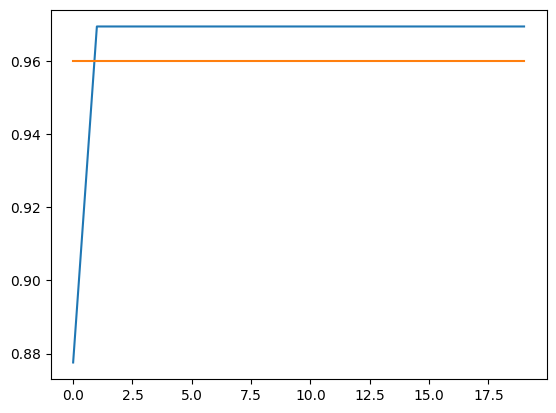

In [42]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

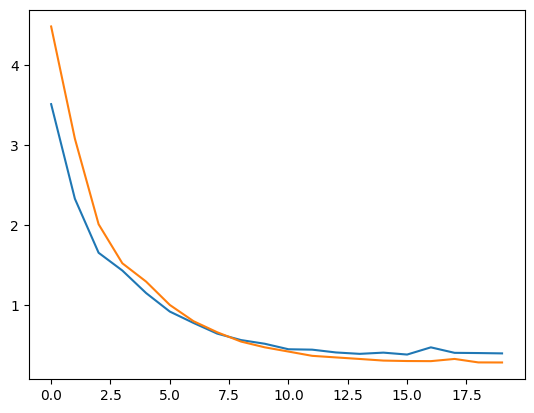

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [44]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 27ms/step - loss: 0.2084 - accuracy: 1.0000


[0.20837464928627014, 1.0]

In [56]:
from google.colab.patches import cv2_imshow
import cv2

cap=cv2.VideoCapture(0)

while True:
  ret,frame=cap.read()

#calling detect



  cv2_imshow('window',frame)
  if cv2.waitkey(1) & 0xff == ord('5'):
   break

cv.destroyAllWindows()


TypeError: ignored

In [ ]:
def detect_mask

In [ ]:
from keras.models import load_model
import numpy as np
model = load_model('/content/model-019.model')


In [ ]:

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

while(True):

    ret,img=cap.read()

    faces=face_clsfr.detectMultiScale(img,1.3,5)

    for x,y,w,h in faces:

        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]

        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)


    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)

    if(key==27):
        break

cv2.destroyAllWindows()
cap.release()